In [48]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
housing_data = pd.read_csv("newhousing.csv")
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_data)
housing = pd.DataFrame(scaler.transform(housing_data),columns=housing_data.columns)


In [51]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = housing.drop(['price'],axis=1)

# Putting response variable to y
y = housing['price']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [62]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=6,random_state=100)
#pca1 = PCA(n_components=2,random_state=100)
#Doing the PCA on the train data
df_train_pca = pca.fit_transform(X_train)
df_train_pca_xtest = pca.transform(X_test)
#df_train_pca_xtest.shape
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2,PC3
0,area,0.488610,0.244571,-0.058169
1,bedrooms,0.126546,-0.501502,-0.098321
2,bathrooms,0.289377,-0.316644,0.494317
3,stories,0.171626,-0.389724,0.164804
4,mainroad,0.323996,0.132260,-0.060247


In [63]:
pca.explained_variance_ratio_

array([0.17864224, 0.13463979, 0.10802763, 0.09846619, 0.08965828,
       0.07200172])

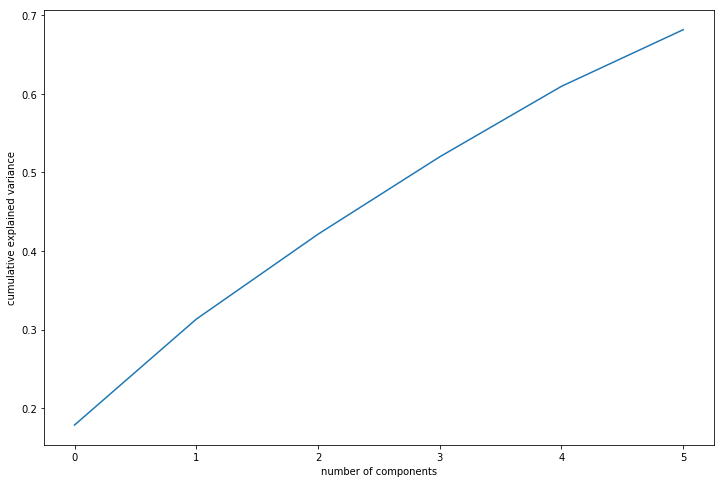

In [64]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lm = LinearRegression()
lm.fit(df_train_pca, y_train)
y_pred = lm.predict(df_train_pca_xtest)
mse = mean_squared_error(y_test, y_pred)
print(round(mse,2))

0.33
